In [36]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

path=r'C:\Users\nikit\OneDrive\Desktop\Psn\trab_final\excelfiles'
df = pd.read_excel(os.path.join(path,'O seu municipio em numeros! Abrantes.xls'))

# Limpeza do Data Frame resultante
df=df[6:78]
df=df.drop(['Unnamed: 1','Unnamed: 3','Unnamed: 5','Unnamed: 6'],axis=1)#axis 1 porque é para eleminar coluna
df.columns=['Municipio']+df.loc[7].tolist()[1:]
df.loc[6]=['Ano',2010,2019]
df=df.drop(7)
df=df.transpose()
df.columns=df.loc['Municipio']
df=df.drop(['Municipio'])
    
print('primeira parte foi lida')


df

primeira parte foi lida


Municipio,Ano,População residente,Superfície em km2,Densidade populacional,número médio de indivíduos por km2,Jovens (%),menos de 15 anos,População em idade activa (%),15 aos 64 anos,Idosos (%),...,Receitas da Câmara Municipal (8),"€, milhares",Saldo financeiro da Câmara Municipal,"€, milhares",Transferências recebidas no total das receitas da Câmara Municipal (%),Crimes registados pelas polícias por mil habitantes,Consumo de energia eléctrica por habitante (kWh),Resíduos urbanos recolhidos selectivamente por habitante (kg),Despesas do município em ambiente (%),Alojamentos turísticos (6)
Portugal,2010,10573100,0,0,NaN,15.2,NaN,66.3,NaN,18.5,...,7.24744e+06,NaN,65461,NaN,49,40.1,4776.8,76.2,8,2011
Portugal,2019,10286263,0,111.5,NaN,13.6,NaN,64.4,NaN,22,...,0,NaN,0,NaN,0,32.6,0,109.6,0,6833


In [37]:
f=open(r'C:\Users\nikit\OneDrive\Desktop\Psn\trab_final\excelfiles\municipios2.txt')
listMun=[m.strip() for m in f.readlines()]

for mun in listMun:
    df1 = pd.read_excel(os.path.join(path,f'O seu municipio em numeros! {mun}.xls'))
    df1=df1[6:78]
    df1=df1.drop(['Unnamed: 2','Unnamed: 4','Unnamed: 5','Unnamed: 6'],axis=1)#axis 1 porque é para eleminar coluna
    df1.columns=['Municipio']+df1.loc[7].tolist()[1:]
    df1.loc[6]=['Ano',2010,2019]
    df1=df1.drop(7)
    df1=df1.transpose()
    df1.columns=df1.loc['Municipio']
    df1=df1.drop(['Municipio'])
    df1.columns=df.columns
    df=df.append(df1)
    
    
df.columns=[c.strip() for c in df.columns]

df=df.drop(['Empresas não financeiras','€, milhares','Superfície em km2'],axis=1)



for c in df.columns:
    if df[c].isnull().all():
        df=df.drop(c,axis=1)
        
df        

,Ano,População residente,Densidade populacional,Jovens (%),População em idade activa (%),Idosos (%),Índice de envelhecimento,População estrangeira (2),População estrangeira em % da população residente (2),Nascimentos (3),...,Trabalhadores da Administração Pública Local,Despesas da Câmara Municipal (7),Receitas da Câmara Municipal (8),Saldo financeiro da Câmara Municipal,Transferências recebidas no total das receitas da Câmara Municipal (%),Crimes registados pelas polícias por mil habitantes,Consumo de energia eléctrica por habitante (kWh),Resíduos urbanos recolhidos selectivamente por habitante (kg),Despesas do município em ambiente (%),Alojamentos turísticos (6)
Portugal,2010,10573100,0,15.2,66.3,18.5,122,443055,4.2,0,...,135527,7.18198e+06,7.24744e+06,65461,49,40.1,4776.8,76.2,8,2011
Portugal,2019,10286263,111.5,13.6,64.4,22,161,588976,5.7,86579,...,128094,0,0,0,0,32.6,0,109.6,0,6833
Abrantes,2010,39637,0,12.8,61.6,25.6,200,652,1.6,0,...,407,23972,25909.4,1937,63.8,32.4,4075.9,66.2,5,4
Abrantes,2019,35254,49.3,10.9,60.3,28.8,264,497,1.4,201,...,368,0,0,0,0,21.6,0,65.1,0,14
Águeda,2010,47875,0,13.9,67.3,18.8,135,1176,2.5,0,...,436,27661,27699.6,39,54,33.8,5421.9,52.4,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viseu,2019,97120,191.5,13.5,65.3,21.2,157,2624,2.7,777,...,814,0,0,0,0,25.8,0,64.5,0,30
Vizela,2010,23739,0,17,72.1,10.9,64,140,0.6,0,...,311,11371.3,11491.1,120,66.4,38.3,3906.8,42.1,4,0
Vizela,2019,23869,966.3,13.2,71.6,15.3,116,191,0.8,203,...,260,0,0,0,0,17.8,0,66.7,0,3
Vouzela,2010,10656,0,12.7,60.7,26.6,210,92,0.9,0,...,179,9657.7,10299.6,642,77.3,31,2937.2,26.1,7,1


In [38]:
# df.to_excel(os.path.join(path,'data_V1.xls'))

df.to_excel('data_V1.xls')

In [39]:
df2010=df.loc[df['Ano']==2010]

df2010.to_excel('data_V2.xls')

In [40]:
df2019=df.loc[df['Ano']==2019]
df2019

,Ano,População residente,Densidade populacional,Jovens (%),População em idade activa (%),Idosos (%),Índice de envelhecimento,População estrangeira (2),População estrangeira em % da população residente (2),Nascimentos (3),...,Trabalhadores da Administração Pública Local,Despesas da Câmara Municipal (7),Receitas da Câmara Municipal (8),Saldo financeiro da Câmara Municipal,Transferências recebidas no total das receitas da Câmara Municipal (%),Crimes registados pelas polícias por mil habitantes,Consumo de energia eléctrica por habitante (kWh),Resíduos urbanos recolhidos selectivamente por habitante (kg),Despesas do município em ambiente (%),Alojamentos turísticos (6)
Portugal,2019,10286263,111.5,13.6,64.4,22,161,588976,5.7,86579,...,128094,0,0,0,0,32.6,0,109.6,0,6833
Abrantes,2019,35254,49.3,10.9,60.3,28.8,264,497,1.4,201,...,368,0,0,0,0,21.6,0,65.1,0,14
Águeda,2019,46034,137.3,12,64.1,23.9,199,1125,2.4,361,...,453,0,0,0,0,31.1,0,62.6,0,10
Aguiar da Beira,2019,4696,22.7,8.7,65.3,26,300,56,1.2,23,...,100,0,0,0,0,21.3,0,63.5,0,5
Alandroal,2019,5028,9.3,10.4,59,30.6,295,105,2.1,18,...,208,0,0,0,0,18.1,0,68.2,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vimioso,2019,4047,8.4,10.5,54.4,35.1,334,50,1.2,28,...,175,0,0,0,0,30.4,0,28.9,0,8
Vinhais,2019,7797,11.2,6.9,51.1,42,604,41,0.5,27,...,196,0,0,0,0,22.4,0,25.5,0,8
Viseu,2019,97120,191.5,13.5,65.3,21.2,157,2624,2.7,777,...,814,0,0,0,0,25.8,0,64.5,0,30
Vizela,2019,23869,966.3,13.2,71.6,15.3,116,191,0.8,203,...,260,0,0,0,0,17.8,0,66.7,0,3


In [41]:
df2 = pd.read_csv(r'C:\Users\nikit\OneDrive\Desktop\Psn\trab_final\excelfiles\data_V2_2010.csv')#juntei o df da aula com valores novos do pordata no excel 
df2

,Municipios,Ano,População residente,Densidade populacional,Jovens (%),População em idade activa (%),Idosos (%),Índice de envelhecimento,População estrangeira (2),População estrangeira em % da população residente (2),...,Resíduos urbanos recolhidos selectivamente por habitante (kg),Despesas do município em ambiente (%),Alojamentos turísticos (6),(%)sem nivel de escolaridade,(%) Básico 1º ciclo,(%)Básico 2º ciclo,(%)Básico 3º ciclo,(%)Secundário,(%)Médio,(%)Superior
0,Portugal,2010,10573100,0,15.2,66.3,18.5,122,443055,4.2,...,76.2,8,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abrantes,2010,39637,0,12.8,61.6,25.6,200,652,1.6,...,66.2,5,4,12.8,31.1,11.5,19.3,14.3,0.7,10.3
2,Águeda,2010,47875,0,13.9,67.3,18.8,135,1176,2.5,...,52.4,5,6,10.0,30.5,15.9,19.2,13.6,1.0,9.7
3,Aguiar da Beira,2010,5539,0,11.7,61.7,26.6,227,38,0.7,...,22.4,3,1,25.4,35.8,9.4,13.5,10.6,0.7,4.6
4,Alandroal,2010,5909,0,11.2,58.0,30.7,274,130,2.2,...,42.5,2,0,20.3,35.6,13.6,15.2,10.0,0.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Vimioso,2010,4738,0,9.7,53.3,37.0,381,39,0.8,...,29.8,17,1,23.2,38.2,11.1,12.8,8.5,0.4,5.7
305,Vinhais,2010,9205,0,8.4,53.7,37.9,452,39,0.4,...,30.3,4,1,21.2,39.9,14.2,10.5,8.7,0.5,5.0
306,Viseu,2010,99114,0,15.8,66.7,17.6,111,2191,2.2,...,37.9,8,13,9.9,25.7,11.3,18.1,16.4,0.8,17.8
307,Vizela,2010,23739,0,17.0,72.1,10.9,64,140,0.6,...,42.1,4,0,9.9,34.3,17.4,19.8,11.9,0.6,6.1


In [58]:
df_corr=df2.drop(['Ano','Densidade populacional'],axis=1)
df_corr= df_corr.iloc[1: , :]
corr_matrix=df_corr.corr()

corr_matrix




,População residente,Jovens (%),População em idade activa (%),Idosos (%),Índice de envelhecimento,População estrangeira (2),População estrangeira em % da população residente (2),Nascimentos (3),Óbitos,Taxa de mortalidade infantil (‰),...,Resíduos urbanos recolhidos selectivamente por habitante (kg),Despesas do município em ambiente (%),Alojamentos turísticos (6),(%)sem nivel de escolaridade,(%) Básico 1º ciclo,(%)Básico 2º ciclo,(%)Básico 3º ciclo,(%)Secundário,(%)Médio,(%)Superior
População residente,1.000000,0.282026,0.381141,-0.362432,-0.312137,0.831611,0.226387,0.140161,0.943734,0.140161,...,0.179118,0.398562,0.564482,-0.523544,-0.522806,-0.024744,0.345470,0.469678,0.358906,0.667968
Jovens (%),0.282026,1.000000,0.795179,-0.914756,-0.911405,0.189404,0.174284,0.037263,0.162250,0.037263,...,0.120632,0.221070,0.126419,-0.666600,-0.544121,0.614188,0.625887,0.420569,0.427884,0.310253
População em idade activa (%),0.381141,0.795179,1.000000,-0.972333,-0.915354,0.191361,0.120459,0.024969,0.241149,0.024969,...,0.073548,0.261442,0.163080,-0.825680,-0.517054,0.584661,0.664432,0.483314,0.414808,0.423693
Idosos (%),-0.362432,-0.914756,-0.972333,1.000000,0.960734,-0.200170,-0.146763,-0.030148,-0.223024,-0.030148,...,-0.095281,-0.258918,-0.157572,0.806411,0.553296,-0.626974,-0.683092,-0.483119,-0.440478,-0.400879
Índice de envelhecimento,-0.312137,-0.911405,-0.915354,0.960734,1.000000,-0.188543,-0.165697,-0.034035,-0.198987,-0.034035,...,-0.109770,-0.228072,-0.146077,0.755454,0.563643,-0.568184,-0.675418,-0.492765,-0.446640,-0.385861
População estrangeira (2),0.831611,0.189404,0.191361,-0.200170,-0.188543,1.000000,0.501668,0.120458,0.825863,0.120458,...,0.358939,0.317436,0.621779,-0.382673,-0.503597,-0.175833,0.315634,0.498745,0.375819,0.568843
População estrangeira em % da população residente (2),0.226387,0.174284,0.120459,-0.146763,-0.165697,0.501668,1.000000,0.049417,0.207877,0.049417,...,0.738578,0.217649,0.457217,-0.291839,-0.523862,-0.200614,0.445426,0.609902,0.447921,0.331755
Nascimentos (3),0.140161,0.037263,0.024969,-0.030148,-0.034035,0.120458,0.049417,1.000000,0.111217,1.000000,...,0.123650,0.027943,0.001594,-0.109152,-0.180846,-0.108056,0.010583,0.142723,0.098900,0.290703
Óbitos,0.943734,0.162250,0.241149,-0.223024,-0.198987,0.825863,0.207877,0.111217,1.000000,0.111217,...,0.147112,0.370124,0.684379,-0.416238,-0.458810,-0.116414,0.232193,0.392580,0.297154,0.654515
Taxa de mortalidade infantil (‰),0.140161,0.037263,0.024969,-0.030148,-0.034035,0.120458,0.049417,1.000000,0.111217,1.000000,...,0.123650,0.027943,0.001594,-0.109152,-0.180846,-0.108056,0.010583,0.142723,0.098900,0.290703


<AxesSubplot:>

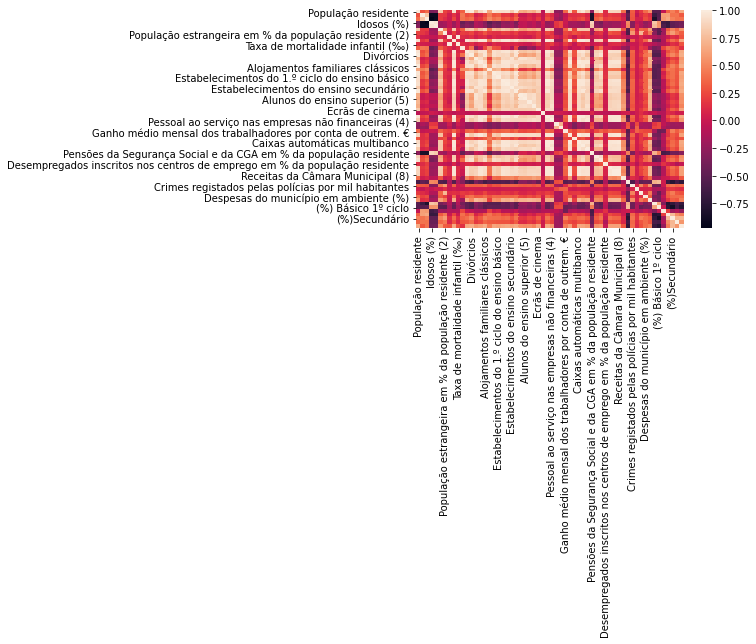

In [59]:
sns.heatmap(corr_matrix)

In [62]:
corr_matrix_abs = corr_matrix.abs()

for i in corr_matrix_abs.index:
     corr_matrix_abs[i]=corr_matrix_abs[(corr_matrix_abs[i]> 0.55) & (corr_matrix_abs[i] < 0.96)]
        
upper = corr_matrix_abs.where(np.triu(np.ones(corr_matrix_abs.shape), k=1).astype(np.bool))  

serie = upper.unstack().sort_values()



serie=serie.dropna()
corr_final= serie.to_frame()
corr_final.to_excel(r'corr.xls')
corr_final

,,0
(%)Superior,Transferências recebidas no total das receitas da Câmara Municipal (%),0.595373
Crimes registados pelas polícias por mil habitantes,Transferências recebidas no total das receitas da Câmara Municipal (%),0.595373
(%)sem nivel de escolaridade,Transferências recebidas no total das receitas da Câmara Municipal (%),0.595373
(%)Básico 3º ciclo,Transferências recebidas no total das receitas da Câmara Municipal (%),0.595373
(%)Secundário,Transferências recebidas no total das receitas da Câmara Municipal (%),0.595373
...,...,...
Farmácias (1),Casamentos,0.957222
Sessões de espectáculos ao vivo,Casamentos,0.957222
Trabalhadores da Administração Pública Local,Casamentos,0.957222
Beneficiários do Rendimento Social de Inserção (RSI),Casamentos,0.957222


<AxesSubplot:>

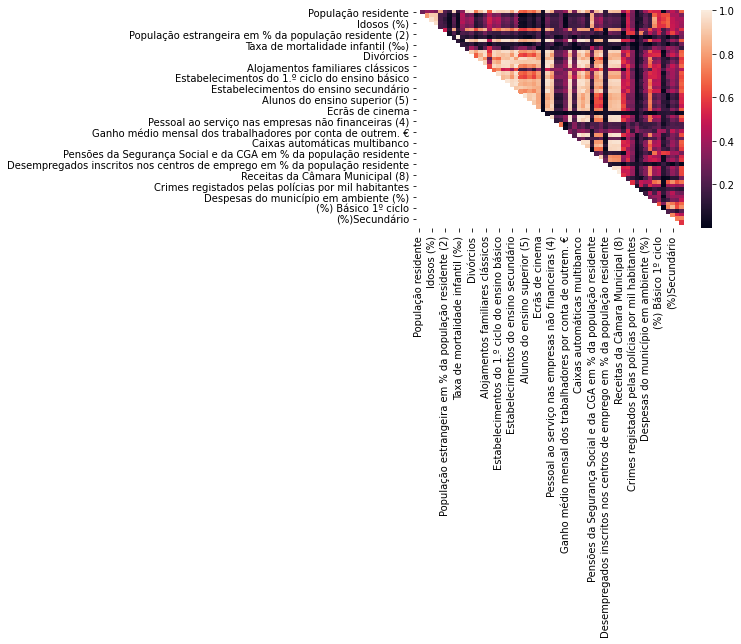

In [43]:
litoral = ['Lisboa', 'Porto', 'Coimbra', 'Setúbal', 'Braga']
interior = ['Aljustrel', 'Évora', 'Beja', 'Lamego', 'Bragança']


